In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read csv:
#df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=';', index_col=0,keep_default_na=False).T
df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=',')
df.head(9)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,410,410,411,413,414,414,418,418,422,426
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,102,119,120
5,Guangdong,Mainland China,23.3417,113.4244,26,32,53,78,111,151,...,1347,1348,1349,1349,1350,1350,1350,1351,1352,1352
6,Guangxi,Mainland China,23.8298,108.7881,2,5,23,23,36,46,...,252,252,252,252,252,252,252,252,252,252
7,Guizhou,Mainland China,26.8154,106.8748,1,3,3,4,5,7,...,146,146,146,146,146,146,146,146,146,146
8,Hainan,Mainland China,19.1959,109.7453,4,5,8,19,22,33,...,168,168,168,168,168,168,168,168,168,168


In [3]:
# re-set the index (row headers):
df2 = df.set_index(['Country/Region','Province/State'])
df2.head(7)

Lat      Long  1/22/20  1/23/20  1/24/20  \
Country/Region Province/State                                                 
Mainland China Anhui           31.8257  117.2264        1        9       15   
               Beijing         40.1824  116.4142       14       22       36   
               Chongqing       30.0572  107.8740        6        9       27   
               Fujian          26.0789  117.9874        1        5       10   
               Gansu           36.0611  103.8343        0        2        2   
               Guangdong       23.3417  113.4244       26       32       53   
               Guangxi         23.8298  108.7881        2        5       23   

                               1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
Country/Region Province/State                                                
Mainland China Anhui                39       60       70      106      152   
               Beijing              41       68       80       91      111   
               Chongqing            57       75      110      132      147   
               Fujian               18       35       59       80       84   
               Gansu                 4        7       14       19       24   
               Guangdong            78      111      151      207      277   
               Guangxi              23       36       46       51       58   

                               ...  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  \
Country/Region Province/State  ...                                              
Mainland China Anhui           ...      989      990      990     990     990   
               Beijing         ...      410      410      411     413     414   
               Chongqing       ...      576      576      576     576     576   
               Fujian          ...      296      296      296     296     296   
               Gansu           ...       91       91       91      91      91   
               Guangdong       ...     1347     1348     1349    1349    1350   
               Guangxi         ...      252      252      252     252     252   

                               3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  
Country/Region Province/State                                          
Mainland China Anhui              990     990     990     990     990  
               Beijing            414     418     418     422     426  
               Chongqing          576     576     576     576     576  
               Fujian             296     296     296     296     296  
               Gansu               91      91     102     119     120  
               Guangdong         1350    1350    1351    1352    1352  
               Guangxi            252     252     252     252     252  

[7 rows x 48 columns]

In [4]:
#remove spurious last column:
df2b = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
df2b.head(5)

Lat      Long  1/22/20  1/23/20  1/24/20  \
Country/Region Province/State                                                 
Mainland China Anhui           31.8257  117.2264        1        9       15   
               Beijing         40.1824  116.4142       14       22       36   
               Chongqing       30.0572  107.8740        6        9       27   
               Fujian          26.0789  117.9874        1        5       10   
               Gansu           36.0611  103.8343        0        2        2   

                               1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
Country/Region Province/State                                                
Mainland China Anhui                39       60       70      106      152   
               Beijing              41       68       80       91      111   
               Chongqing            57       75      110      132      147   
               Fujian               18       35       59       80       84   
               Gansu                 4        7       14       19       24   

                               ...  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  \
Country/Region Province/State  ...                                              
Mainland China Anhui           ...      989      990      990     990     990   
               Beijing         ...      410      410      411     413     414   
               Chongqing       ...      576      576      576     576     576   
               Fujian          ...      296      296      296     296     296   
               Gansu           ...       91       91       91      91      91   

                               3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  
Country/Region Province/State                                          
Mainland China Anhui              990     990     990     990     990  
               Beijing            414     418     418     422     426  
               Chongqing          576     576     576     576     576  
               Fujian             296     296     296     296     296  
               Gansu               91      91     102     119     120  

[5 rows x 48 columns]

In [5]:
# transpose:
df3 = df2b.T
df3.head(5)

Country/Region Mainland China                                          \
Province/State          Anhui   Beijing Chongqing    Fujian     Gansu   
Lat                   31.8257   40.1824   30.0572   26.0789   36.0611   
Long                 117.2264  116.4142  107.8740  117.9874  103.8343   
1/22/20                1.0000   14.0000    6.0000    1.0000    0.0000   
1/23/20                9.0000   22.0000    9.0000    5.0000    2.0000   
1/24/20               15.0000   36.0000   27.0000   10.0000    2.0000   

Country/Region                                                    ...  \
Province/State Guangdong   Guangxi   Guizhou    Hainan     Hebei  ...   
Lat              23.3417   23.8298   26.8154   19.1959   38.0428  ...   
Long            113.4244  108.7881  106.8748  109.7453  114.5149  ...   
1/22/20          26.0000    2.0000    1.0000    4.0000    1.0000  ...   
1/23/20          32.0000    5.0000    3.0000    5.0000    1.0000  ...   
1/24/20          53.0000   23.0000    3.0000    8.0000    2.0000  ...   

Country/Region                  US                                          \
Province/State Jackson County, OR  Jefferson County, WA Kershaw County, SC   
Lat                        42.3345              47.7425            34.3672   
Long                     -122.7647            -123.3040           -80.5883   
1/22/20                     0.0000               0.0000             0.0000   
1/23/20                     0.0000               0.0000             0.0000   
1/24/20                     0.0000               0.0000             0.0000   

Country/Region                                                         \
Province/State Klamath County, OR Madera County, CA Pierce County, WA   
Lat                       42.6953           37.2519           47.0676   
Long                    -121.6142         -119.6963         -122.1295   
1/22/20                    0.0000            0.0000            0.0000   
1/23/20                    0.0000            0.0000            0.0000   
1/24/20                    0.0000            0.0000            0.0000   

Country/Region                                                             \
Province/State Plymouth County, MA Santa Cruz County, CA Tulsa County, OK   
Lat                        42.1615               36.9741          36.1593   
Long                      -70.7928             -122.0308         -95.9410   
1/22/20                     0.0000                0.0000           0.0000   
1/23/20                     0.0000                0.0000           0.0000   
1/24/20                     0.0000                0.0000           0.0000   

Country/Region                        
Province/State Montgomery County, TX  
Lat                          30.3213  
Long                        -95.4778  
1/22/20                       0.0000  
1/23/20                       0.0000  
1/24/20                       0.0000  

[5 rows x 225 columns]

In [6]:
# remove Lat/Long rows
df4 = df3.drop(['Lat','Long'])
df4.tail(3)

Country/Region Mainland China                                            \
Province/State          Anhui Beijing Chongqing Fujian  Gansu Guangdong   
3/5/20                  990.0   418.0     576.0  296.0  102.0    1351.0   
3/6/20                  990.0   422.0     576.0  296.0  119.0    1352.0   
3/7/20                  990.0   426.0     576.0  296.0  120.0    1352.0   

Country/Region                                ...                  US  \
Province/State Guangxi Guizhou Hainan  Hebei  ... Jackson County, OR    
3/5/20           252.0   146.0  168.0  318.0  ...                 0.0   
3/6/20           252.0   146.0  168.0  318.0  ...                 0.0   
3/7/20           252.0   146.0  168.0  318.0  ...                 1.0   

Country/Region                                                             \
Province/State Jefferson County, WA Kershaw County, SC Klamath County, OR   
3/5/20                          0.0                0.0                0.0   
3/6/20                          0.0                0.0                0.0   
3/7/20                          1.0                1.0                1.0   

Country/Region                                                          \
Province/State Madera County, CA Pierce County, WA Plymouth County, MA   
3/5/20                       0.0               0.0                 0.0   
3/6/20                       0.0               0.0                 1.0   
3/7/20                       1.0               1.0                 1.0   

Country/Region                                                               
Province/State Santa Cruz County, CA Tulsa County, OK Montgomery County, TX  
3/5/20                           0.0              0.0                   0.0  
3/6/20                           0.0              0.0                   0.0  
3/7/20                           1.0              1.0                   0.0  

[3 rows x 225 columns]

In [45]:
# fill missing values:
df5 = df4.fillna(value=0)
df5.head(3)

Country/Region Mainland China                                           \
Province/State          Anhui Beijing Chongqing Fujian Gansu Guangdong   
1/22/20                   1.0    14.0       6.0    1.0   0.0      26.0   
1/23/20                   9.0    22.0       9.0    5.0   2.0      32.0   
1/24/20                  15.0    36.0      27.0   10.0   2.0      53.0   

Country/Region                               ...                  US  \
Province/State Guangxi Guizhou Hainan Hebei  ... Jackson County, OR    
1/22/20            2.0     1.0    4.0   1.0  ...                 0.0   
1/23/20            5.0     3.0    5.0   1.0  ...                 0.0   
1/24/20           23.0     3.0    8.0   2.0  ...                 0.0   

Country/Region                                                             \
Province/State Jefferson County, WA Kershaw County, SC Klamath County, OR   
1/22/20                         0.0                0.0                0.0   
1/23/20                         0.0                0.0                0.0   
1/24/20                         0.0                0.0                0.0   

Country/Region                                                          \
Province/State Madera County, CA Pierce County, WA Plymouth County, MA   
1/22/20                      0.0               0.0                 0.0   
1/23/20                      0.0               0.0                 0.0   
1/24/20                      0.0               0.0                 0.0   

Country/Region                                                               
Province/State Santa Cruz County, CA Tulsa County, OK Montgomery County, TX  
1/22/20                          0.0              0.0                   0.0  
1/23/20                          0.0              0.0                   0.0  
1/24/20                          0.0              0.0                   0.0  

[3 rows x 225 columns]

In [47]:
df5.index = pd.DatetimeIndex(df5.index)
df5.tail(3)

Country/Region Mainland China                                            \
Province/State          Anhui Beijing Chongqing Fujian  Gansu Guangdong   
2020-03-05              990.0   418.0     576.0  296.0  102.0    1351.0   
2020-03-06              990.0   422.0     576.0  296.0  119.0    1352.0   
2020-03-07              990.0   426.0     576.0  296.0  120.0    1352.0   

Country/Region                                ...                  US  \
Province/State Guangxi Guizhou Hainan  Hebei  ... Jackson County, OR    
2020-03-05       252.0   146.0  168.0  318.0  ...                 0.0   
2020-03-06       252.0   146.0  168.0  318.0  ...                 0.0   
2020-03-07       252.0   146.0  168.0  318.0  ...                 1.0   

Country/Region                                                             \
Province/State Jefferson County, WA Kershaw County, SC Klamath County, OR   
2020-03-05                      0.0                0.0                0.0   
2020-03-06                      0.0                0.0                0.0   
2020-03-07                      1.0                1.0                1.0   

Country/Region                                                          \
Province/State Madera County, CA Pierce County, WA Plymouth County, MA   
2020-03-05                   0.0               0.0                 0.0   
2020-03-06                   0.0               0.0                 1.0   
2020-03-07                   1.0               1.0                 1.0   

Country/Region                                                               
Province/State Santa Cruz County, CA Tulsa County, OK Montgomery County, TX  
2020-03-05                       0.0              0.0                   0.0  
2020-03-06                       0.0              0.0                   0.0  
2020-03-07                       1.0              1.0                   0.0  

[3 rows x 225 columns]

In [61]:
pop = pd.read_csv("populations.csv",sep=",",header=[0,1]).fillna(value=np.inf)
pop

Mainland China                                                           \
           Anhui Beijing Chongqing Fujian Gansu Guangdong Guangxi Guizhou   
0            inf      22       inf    inf   inf       inf     inf     inf   

                ...                  US                       \
  Hainan Hebei  ... Jackson County, OR  Jefferson County, WA   
0    inf   inf  ...                 inf                  inf   

                                                                             \
  Kershaw County, SC Klamath County, OR Madera County, CA Pierce County, WA   
0                inf                inf               inf               inf   

                                                              \
  Plymouth County, MA Santa Cruz County, CA Tulsa County, OK   
0                 inf                   inf              inf   

                         
  Montgomery County, TX  
0                   inf  

[1 rows x 225 columns]

In [64]:
df5b = df5/pop.values[0,:]
df5b.head(3)

Country/Region Mainland China                                             \
Province/State          Anhui   Beijing Chongqing Fujian Gansu Guangdong   
2020-01-22                0.0  0.636364       0.0    0.0   0.0       0.0   
2020-01-23                0.0  1.000000       0.0    0.0   0.0       0.0   
2020-01-24                0.0  1.636364       0.0    0.0   0.0       0.0   

Country/Region                               ...                  US  \
Province/State Guangxi Guizhou Hainan Hebei  ... Jackson County, OR    
2020-01-22         0.0     0.0    0.0   0.0  ...                 0.0   
2020-01-23         0.0     0.0    0.0   0.0  ...                 0.0   
2020-01-24         0.0     0.0    0.0   0.0  ...                 0.0   

Country/Region                                                             \
Province/State Jefferson County, WA Kershaw County, SC Klamath County, OR   
2020-01-22                      0.0                0.0                0.0   
2020-01-23                      0.0                0.0                0.0   
2020-01-24                      0.0                0.0                0.0   

Country/Region                                                          \
Province/State Madera County, CA Pierce County, WA Plymouth County, MA   
2020-01-22                   0.0               0.0                 0.0   
2020-01-23                   0.0               0.0                 0.0   
2020-01-24                   0.0               0.0                 0.0   

Country/Region                                                               
Province/State Santa Cruz County, CA Tulsa County, OK Montgomery County, TX  
2020-01-22                       0.0              0.0                   0.0  
2020-01-23                       0.0              0.0                   0.0  
2020-01-24                       0.0              0.0                   0.0  

[3 rows x 225 columns]

In [150]:
hb = df5b["Mainland China","Hubei"]
hb.index = pd.date_range(start="2020-02-25",periods=hb.size)
hb.name=("Mainland China","Hubei2")
hb.head(3)

2020-02-25    7.40
2020-02-26    7.40
2020-02-27    9.15
Freq: D, Name: (Mainland China, Hubei2), dtype: float64

In [151]:
df5c = pd.concat([df5b,hb],axis=1) #.fillna(value=0)
df5c.head(3)

Country/Region Mainland China                                             \
Province/State          Anhui   Beijing Chongqing Fujian Gansu Guangdong   
2020-01-22                0.0  0.636364       0.0    0.0   0.0       0.0   
2020-01-23                0.0  1.000000       0.0    0.0   0.0       0.0   
2020-01-24                0.0  1.636364       0.0    0.0   0.0       0.0   

Country/Region                               ...                   US  \
Province/State Guangxi Guizhou Hainan Hebei  ... Jefferson County, WA   
2020-01-22         0.0     0.0    0.0   0.0  ...                  0.0   
2020-01-23         0.0     0.0    0.0   0.0  ...                  0.0   
2020-01-24         0.0     0.0    0.0   0.0  ...                  0.0   

Country/Region                                                          \
Province/State Kershaw County, SC Klamath County, OR Madera County, CA   
2020-01-22                    0.0                0.0               0.0   
2020-01-23                    0.0                0.0               0.0   
2020-01-24                    0.0                0.0               0.0   

Country/Region                                                              \
Province/State Pierce County, WA Plymouth County, MA Santa Cruz County, CA   
2020-01-22                   0.0                 0.0                   0.0   
2020-01-23                   0.0                 0.0                   0.0   
2020-01-24                   0.0                 0.0                   0.0   

Country/Region                                        Mainland China  
Province/State Tulsa County, OK Montgomery County, TX         Hubei2  
2020-01-22                  0.0                   0.0            NaN  
2020-01-23                  0.0                   0.0            NaN  
2020-01-24                  0.0                   0.0            NaN  

[3 rows x 226 columns]

In [156]:
df6 = df5c.loc[:,[
    ('Mainland China','Hubei'),
    ('Mainland China','Beijing'),
    ('Germany',''),
    ('Italy',''),
    ('Japan',''),
    ('France',''),
    ('Switzerland',''),
    ('Singapore',''),
    ('South Korea',''),
    ('Mainland China','Hubei2')
]]
df6.tail(3)

Country/Region Mainland China         Germany Italy Japan France Switzerland  \
Province/State          Hubei Beijing     NaN   NaN   NaN    NaN         NaN   
2020-04-08                NaN     NaN     NaN   NaN   NaN    NaN         NaN   
2020-04-09                NaN     NaN     NaN   NaN   NaN    NaN         NaN   
2020-04-10                NaN     NaN     NaN   NaN   NaN    NaN         NaN   

Country/Region Singapore South Korea Mainland China  
Province/State       NaN         NaN         Hubei2  
2020-04-08           NaN         NaN    1124.433333  
2020-04-09           NaN         NaN    1126.533333  
2020-04-10           NaN         NaN    1127.766667

<Figure size 864x720 with 0 Axes>

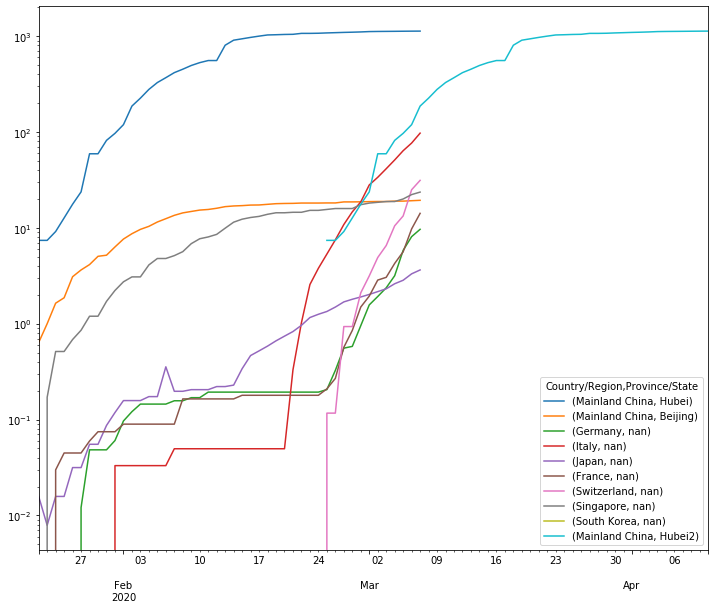

In [157]:
plt.close('all')
plt.rcParams['figure.figsize']=[12,10]
plt.figure()
df6.plot(kind='line',logy=True)


In [51]:
df5.to_csv("all.csv")

In [ ]:
df6['idx'] = df6.reset_index().index
df6.tail(3)

In [ ]:
df6.to_csv("reduced.csv",sep='\t',header=False)

In [43]:
df6.iterrows?

In [88]:
hb = df6["Mainland China"]["Hubei"]
hb.index = pd.date_range(start="2020-02-22",periods=hb.size)
hb.head(3)

2020-02-22    7.40
2020-02-23    7.40
2020-02-24    9.15
Freq: D, Name: Hubei, dtype: float64

In [77]:
hb.index = pd.DatetimeIndex?

In [82]:
pd.date_range(start="2020-01-22",periods=5)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26'],
              dtype='datetime64[ns]', freq='D')

2020-02-22    7.40
2020-02-23    7.40
2020-02-24    9.15
Freq: D, Name: Hubei, dtype: float64